In [ ]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [ ]:
from utils.imports import *
PATH = Path('data/17')
PATH.mkdir(exist_ok=True)
path_x_512 = PATH/'preprocessed'/'2017B'
path_y_512 = PATH/'preprocessed'/'b-class'
path_stats = PATH/'preprocessed'/'2017B'/'stats.npy'

sz = 512
test_size = 0.2
gpu_start = 1
world_size = 4
bs = world_size * 15
num_workers = 1

In [ ]:
%run train_17 {str(PATH)} {str(path_x_512)} {str(path_y_512)} {str(PATH)} {str(path_stats)}\
    {bs} {sz} {gpu_start} --world_size={world_size}

In [5]:
learner.lr_find()

AttributeError: 'NoneType' object has no attribute 'lr_find'

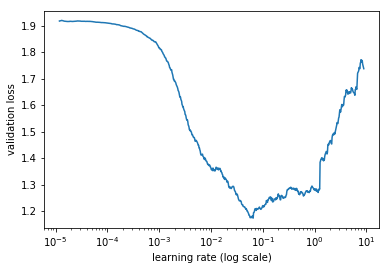

In [6]:
learner.sched.plot()

In [5]:
lr = 3 * 1e-2
name = 'first_run'
log_dir = f'{save_dir}/training_logs'

sargs = {
    'best_save_name': f'{name}_best_model',
    'cycle_save_name': f'{name}',
    'callbacks': [
        LoggingCallback(f'{log_dir}/{name}_log.txt', print_freq)
    ]
}

In [7]:
learner.fit(lr, 30, cycle_len=1, wds=1e-4, **sargs)

epoch      trn_loss   val_loss   
    0      0.922744   0.742735  
    1      0.685232   0.563101  
    2      0.603877   0.524849  
    3      0.551407   0.493652  
    4      0.499125   0.471662  
    5      0.477985   0.455207  
    6      0.481635   0.442841  
    7      0.457299   0.426823  
    8      0.480031   0.426355  
    9      0.480907   0.414506  
    10     0.424087   0.404498  
    11     0.47328    0.39866   
    12     0.415149   0.393506  
    13     0.42027    0.391887  
    14     0.396228   0.384291  
    15     0.386368   0.379712  
    16     0.388967   0.376314  
    17     0.382094   0.380842  
    18     0.388576   0.36687   
    19     0.367782   0.362678  
    20     0.373224   0.358398  
    21     0.390279   0.359899  
    22     0.346038   0.358158  
    23     0.37458    0.351823  
    24     0.375004   0.345598  
    25     0.369728   0.339036  
    26     0.365942   0.340368  
    27     0.340005   0.337875  
    28     0.355469   0.341066  
    29   

[0.33756248228140734]

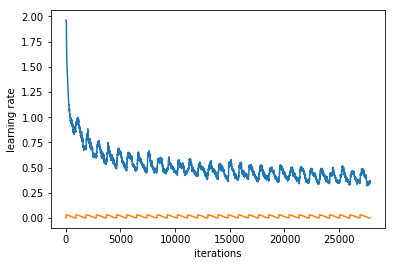

In [9]:
save_sched(learner.sched, save_args)

Second run

In [6]:
sargs = save_args('second_run', save_dir)

In [ ]:
learner.fit(lr, 1, cycle_len=30, wds=1e-4, **sargs)

epoch      trn_loss   val_loss   
    0      1.295502   1.3262    
    1      0.984761   0.875964  
    2      0.75883    0.781338  
    3      0.637143   0.659636  
    4      0.577678   0.522905  
    5      0.59514    0.519008  
    6      0.502914   0.482961  
    7      0.524926   0.46308   
    8      0.482704   0.446322  
    9      0.511796   0.534833  
    10     0.442309   0.425425  
    11     0.460168   0.424404  
    12     0.43051    0.407233  
    13     0.419433   0.377661  
    14     0.390011   0.387018  
    15     0.372927   0.369506  
    16     0.393826   0.35041   
    17     0.371881   0.339988  
    18     0.339941   0.345781  
    19     0.325772   0.32999   
    20     0.329395   0.310985  
    21     0.32497    0.312878  
    22     0.305828   0.304708  
    23     0.275648   0.291252  
    24     0.290158   0.300897  
    25     0.288935   0.290934  
    26     0.265632   0.288252  
    27     0.25269    0.286312  
    28     0.254332   0.286012  
    29   

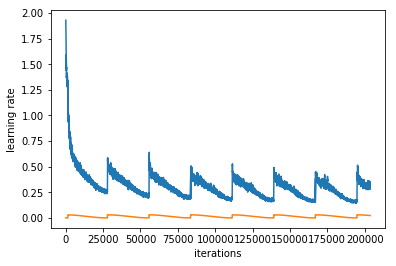

In [29]:
save_sched(learner.sched, save_dir)